# 11. Exploring the Data

## 11.1. General functions/values/df to run the plots. Activate all!



In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [ ]:
final_products_df = products_brands_ol_merge.copy()

In [ ]:
final_products_df_c = final_products_df.copy()

In [ ]:
final_products_df_c['discount_t_f'] = final_products_df_c['price'] > final_products_df_c['unit_price']
# True or false for discounts where given or not

In [ ]:
final_products_df_c["total_revenue"] = final_products_df_c["unit_price"] * final_products_df_c["product_quantity"]
# the price the item was sold for times the qty

## 11.2. Plots for Categories

### 11.2.1. Top 5 categories by revenue

In [ ]:
brands_5_most_sold_df = (
                         final_products_df_c.groupby("category", as_index=False)
                         ["total_revenue"].sum()
                         .nlargest(6, "total_revenue")[1:]
                         )
brands_5_most_sold_df
# a df with only the top 5 categories by total revenue (exluding "others")

,category,total_revenue
10,External hard drive,751351.92
17,Monitor,663982.47
23,Server,466720.01
11,External storage,459158.32
20,RAM,394759.29


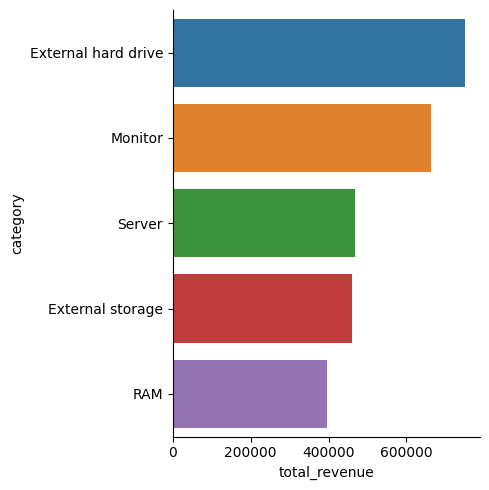

In [ ]:
sns.catplot(kind="bar", data=brands_5_most_sold_df, y="category", x="total_revenue")
# plots top 5 highest categories by revenue

### 11.2.2. Avg percentage of discount given based on the difference of price and unit_price (discount), for the top 5 selling categories

In [ ]:
def calculate_discount_percentage(discount, price):
    return (discount / price) * 100

category_discount_df = (
    final_products_df_c.groupby("category", as_index=False)
    .agg({"discount": "sum", "price": "sum"})
    .nlargest(6, "discount")[1:]
)

category_discount_df["discount_percentage"] = calculate_discount_percentage(category_discount_df["discount"], category_discount_df["price"])
# avg percentage of discount given for the top 5 selling categories

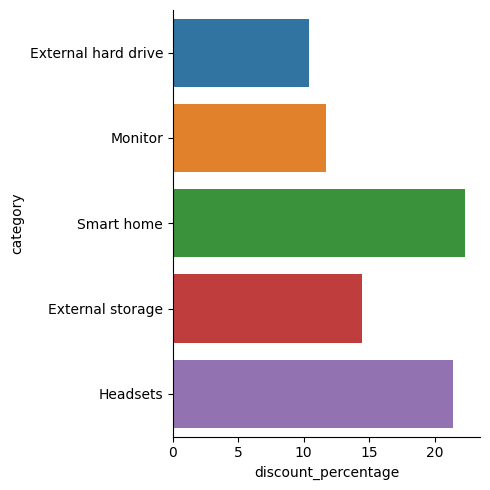

In [ ]:
sns.catplot(kind="bar", data=category_discount_df, x="discount_percentage", y="category")

### 11.2.3. Avg percentage of discount given based on the difference of price and unit_price (discount), for the least 5 selling categories

In [ ]:
def calculate_discount_percentage(discount, price):
    return (discount / price) * 100

category_discount_df_s = (
    final_products_df_c.groupby("category", as_index=False)
    .agg({"discount": "sum", "price": "sum"})
    .nsmallest(5, "discount")
)

category_discount_df_s["discount_percentage"] = calculate_discount_percentage(category_discount_df_s["discount"], category_discount_df_s["price"])

In [ ]:
sns.catplot(kind="bar", data=category_discount_df_s, x="discount_percentage", y="category")

## 11.3. Plots for Products

### 11.3.1. Top 5 sold products per qty

In [ ]:
products_5_most_sold_df = (
    final_products_df_c.groupby(["sku", "name"], as_index=False)
    .agg({"product_quantity": "sum", "discount_t_f": lambda x: (x == True).sum()})
    .nlargest(5, "product_quantity")
    .rename(columns={"product_quantity": "total_quantity", "discount_t_f": "discount_count"})
)
products_5_most_sold_df

(array([   0.,  200.,  400.,  600.,  800., 1000., 1200.]),
 [Text(0.0, 0, '0'),
  Text(200.0, 0, '200'),
  Text(400.0, 0, '400'),
  Text(600.0, 0, '600'),
  Text(800.0, 0, '800'),
  Text(1000.0, 0, '1000'),
  Text(1200.0, 0, '1200')])

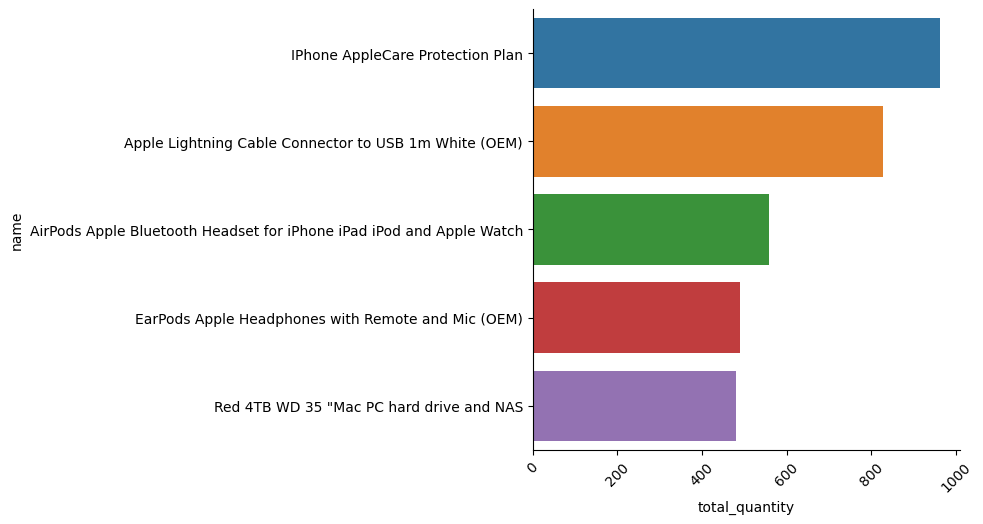

In [ ]:
sns.catplot(kind="bar", data=products_5_most_sold_df, x="total_quantity", y="name")
plt.xticks(rotation=45);
# plot top 5 selling products

### 11.3.2. The top 5 selling products with the highest revenue

In [ ]:
products_5_most_sold_df_revenue = (
     final_products_df_c.groupby(["sku", "name"], as_index=False)
                         ["total_revenue"].sum()
                         .nlargest(5, "total_revenue")
)

In [ ]:
products_5_most_sold_df_revenue

,sku,name,total_revenue
4572,LGE0044,"LG 27UD88-W Monitor 27 ""UHD 4K USB 3.0 USB-C",136270.35
1965,APP2446,Apple iPhone 6 32GB Space Gray,104560.64
1468,APP1922,AirPods Apple Bluetooth Headset for iPhone iPa...,89419.24
1993,APP2477,Apple iPhone 64GB Space Gray 8,86624.52
1518,APP1970,Apple iPhone 32GB Space Gray,81608.03


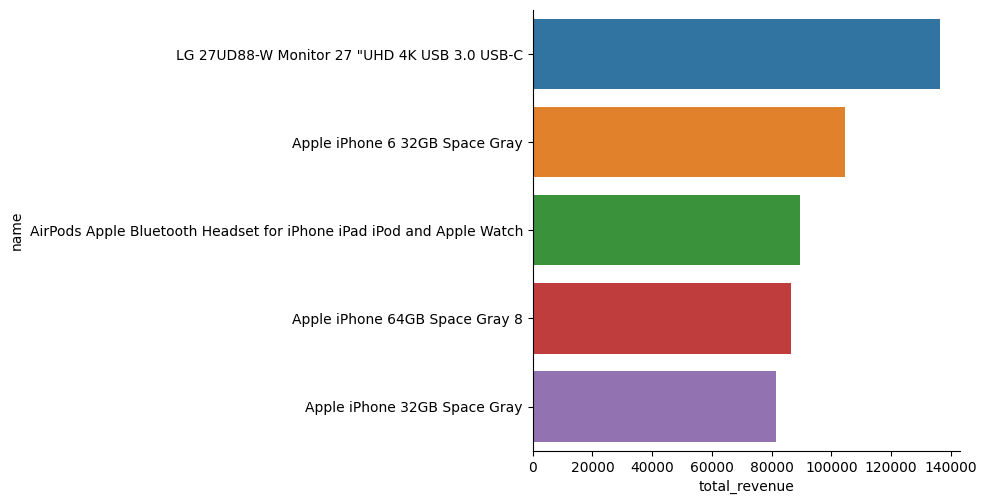

In [ ]:
sns.catplot(kind="bar", data=products_5_most_sold_df_revenue, x="total_revenue", y="name")

### 11.3.3. Top 5 sold products amount how many where sold with a discount

In [ ]:
products_most_sold_wd__df = (
                         final_products_df_c.groupby(["sku", "name"], as_index=False)
                         ["discount_t_f"].sum()
                         .nlargest(6, "discount_t_f")
                         )
products_most_sold_wd__df
# df with most products sold with a discount

In [ ]:
sns.catplot(kind="bar", data=products_most_sold_wd__df, x="discount_t_f", y="name")
# plot that shows most selling products sold with a discount

#discount_t_f is a column with the values True for was sold with discount and false for was not sold with discount. In this plot the True values where counted

### 11.3.4. The top 5 selling products with the highest revenue combined with the avg discount percentage

In [ ]:
def calculate_discount_percentage(discount, price):
    return (discount / price) * 100

products_5_most_sold_df_percentage_rvn = (
    final_products_df_c.groupby(["sku", "name"], as_index=False)
    .agg({"total_revenue": "sum", "discount": "sum", "price": "sum"})
    .nlargest(5, "total_revenue")
)

products_5_most_sold_df_percentage_rvn["discount_percentage"] = calculate_discount_percentage(products_5_most_sold_df_percentage_rvn["discount"], products_5_most_sold_df_percentage_rvn["price"])
# the top 5 products with the highest revenue combined with the avg discount percentage

In [ ]:
sns.catplot(kind="bar", data=products_5_most_sold_df_percentage_rvn, x="discount_percentage", y="name")

### 11.3.5. The top 5 selling products with the highest qty combined with the avg discount percentage

In [ ]:
def calculate_discount_percentage(discount, price):
    return (discount / price) * 100

products_5_most_sold_df_percentage_qty = (
    final_products_df_c.groupby(["sku", "name"], as_index=False)
    .agg({"product_quantity": "sum", "discount": "sum", "price": "sum"})
    .nlargest(5, "product_quantity")
)

products_5_most_sold_df_percentage_qty["discount_percentage"] = calculate_discount_percentage(products_5_most_sold_df_percentage_qty["discount"], products_5_most_sold_df_percentage_qty["price"])
# avg percentage of discount given for the top 5 selling products by qty

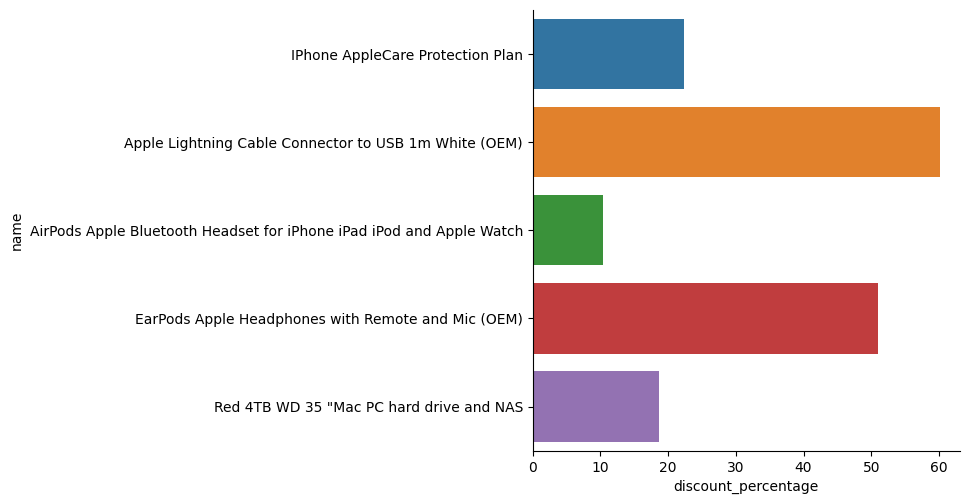

In [ ]:
sns.catplot(kind="bar", data=products_5_most_sold_df_percentage_qty, x="discount_percentage", y="name")

### 11.3.6. Products plots combined for comparision

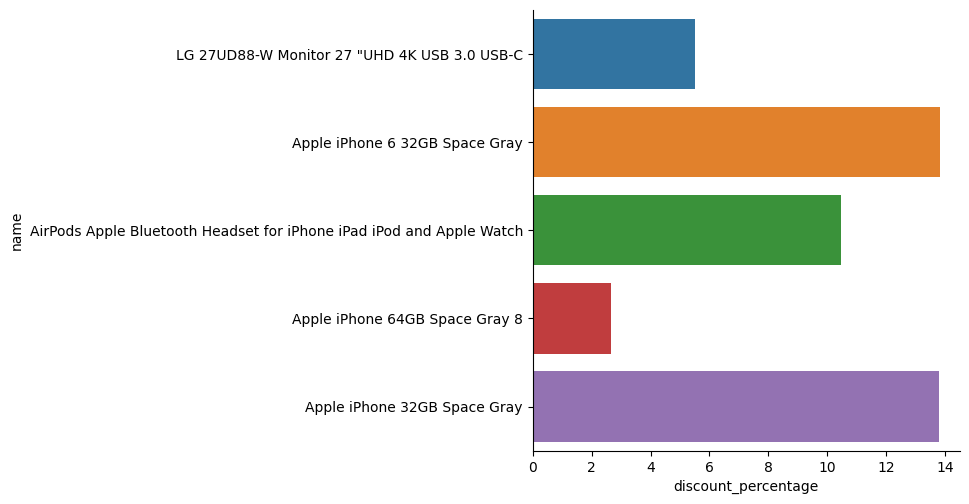

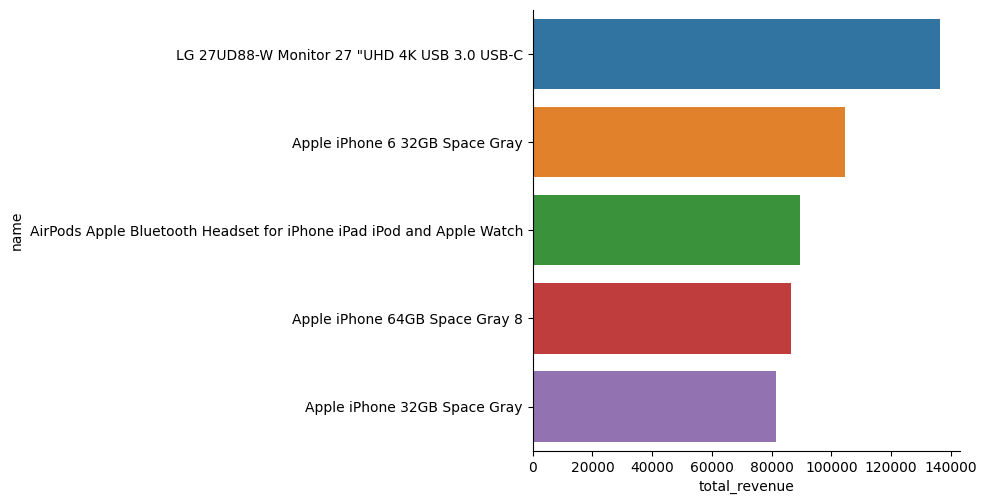

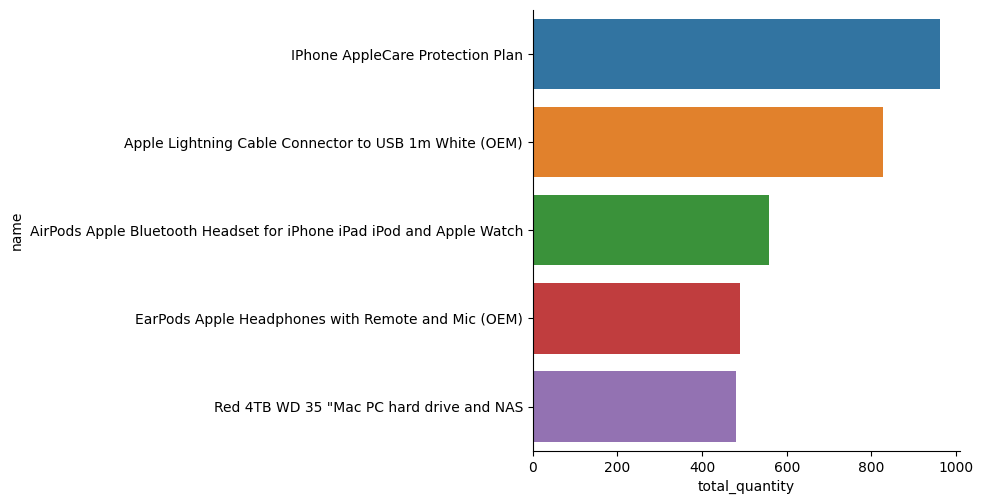

In [ ]:
sns.catplot(kind="bar", data=products_5_most_sold_df_percentage_rvn, x="discount_percentage", y="name")
sns.catplot(kind="bar", data=products_5_most_sold_df_revenue, x="total_revenue", y="name")
sns.catplot(kind="bar", data=products_5_most_sold_df, x="total_quantity", y="name")

### 11.3.7. Top 5 selling brands


In [ ]:
final_products_df

In [ ]:
top_5_selling_brand_rvn = (
     final_products_df_c.groupby(["brands"], as_index=False)
                         ["total_revenue"].sum()
                         .nlargest(5, "total_revenue")
)
top_5_selling_brand_rvn

,brands,total_revenue
6,Apple,2639423.92
108,Pack,471382.86
101,OWC,465107.31
68,LaCie,462344.02
164,Western Digital,369775.18


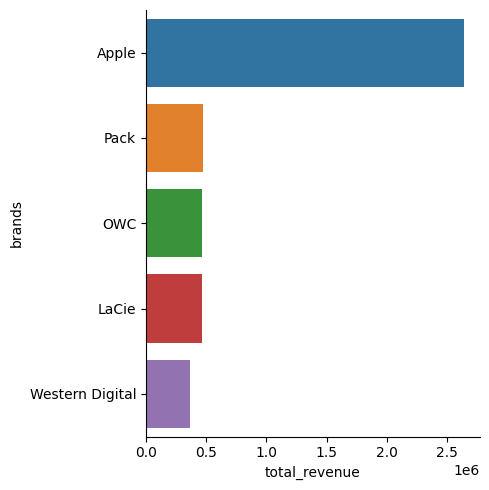

In [ ]:
sns.catplot(kind="bar", data=top_5_selling_brand_rvn, x="total_revenue", y="brands")

In [ ]:
def calculate_discount_percentage(discount, price):
    return (discount / price) * 100

top_5_selling_brand_rvn_p = (
    final_products_df_c.groupby(["brands"], as_index=False)
    .agg({"total_revenue": "sum", "discount": "sum", "price": "sum"})
    .nlargest(5, "total_revenue")
)

top_5_selling_brand_rvn_p["discount_percentage"] = calculate_discount_percentage(top_5_selling_brand_rvn_p["discount"], top_5_selling_brand_rvn_p["price"])

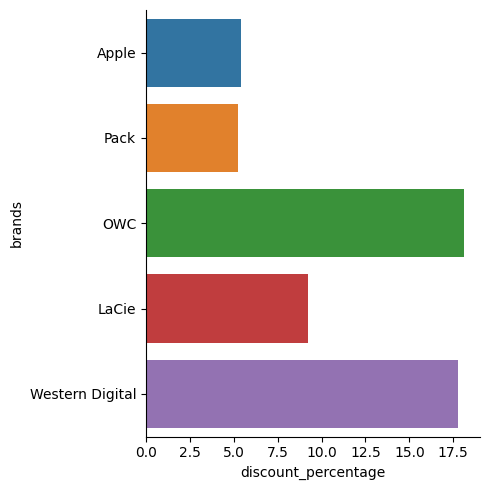

In [ ]:
sns.catplot(kind="bar", data=top_5_selling_brand_rvn_p, x="discount_percentage", y="brands")

## 11.4. Avg discount + total revenue on the full time frame

In [ ]:
orderlines_df_c = orderlines_df.copy()

In [ ]:
final_products_df_c

In [ ]:
merged_tables = final_products_df_c.merge(orderlines_df_c, how="left", on="sku")

In [ ]:
merged_tables.info()

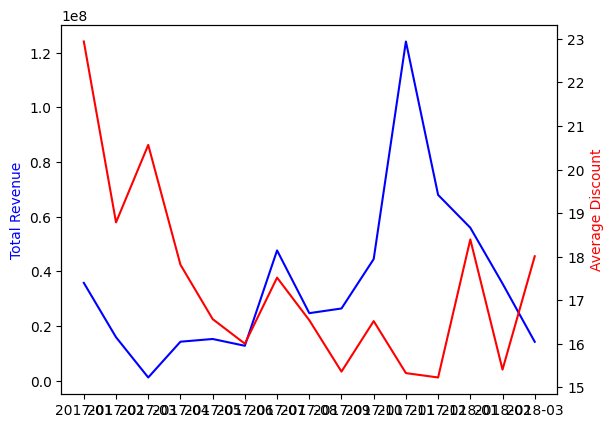

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# group by months and show the avg discount and the unit_price sum
monthly_avg_prices = merged_tables.groupby(merged_tables['date'].dt.to_period('M')).agg({'total_revenue': 'sum', 'discount': 'sum', 'price': 'sum'}).reset_index()

# Berechnung des durchschnittlichen Rabattprozentsatzes
monthly_avg_prices['discount_percentage'] = (monthly_avg_prices['discount'] / monthly_avg_prices['price']) * 100

# Umwandeln des Period-Objekts in einen String
monthly_avg_prices['date'] = monthly_avg_prices['date'].dt.strftime('%Y-%m')

# Plot der Liniencharts
fig, ax1 = plt.subplots()

# Linie für den durchschnittlichen Verkaufspreis pro Jahr und Monat
ax1.plot(monthly_avg_prices['date'], monthly_avg_prices['total_revenue'], color='blue')
ax1.set_ylabel('Total Revenue', color='blue')

ax2 = ax1.twinx()

# Linie für den durchschnittlichen Rabattprozentsatz pro Jahr und Monat
ax2.plot(monthly_avg_prices['date'], monthly_avg_prices['discount_percentage'], color='red')
ax2.set_ylabel('Average Discount', color='red')

plt.xticks(rotation=45)
plt.show()


### 11.4.1. Total rev high priced products & avg percentage of discount these items where sold for

In [ ]:
merged_tables_filtered_high = merged_tables[merged_tables["unit_price_x"] > 500]

In [ ]:
merged_tables_filtered_high["total_rev_500"] = merged_tables_filtered_high["unit_price_x"] * merged_tables_filtered_high["product_quantity_x"]

#### 11.4.1.1. Seaborn Plot

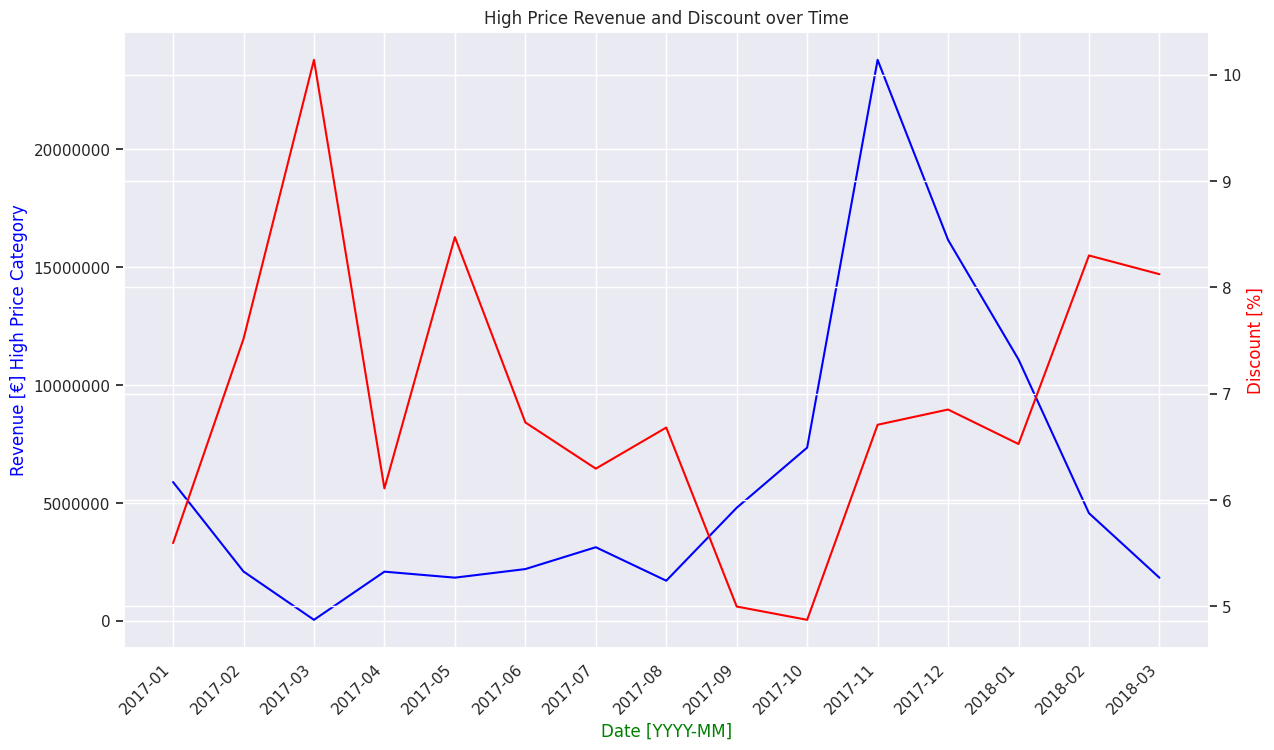

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# group by months and shows the avg discount and the unit_price sum
monthly_avg_prices = merged_tables_filtered_high.groupby(merged_tables['date'].dt.to_period('M')).agg({'total_rev_500': 'sum', 'discount': 'sum', 'price': 'sum'}).reset_index()

# calculates the avg percentage of given discounts
monthly_avg_prices['discount_percentage'] = (monthly_avg_prices['discount'] / monthly_avg_prices['price']) * 100

# changing the date dtype to string
monthly_avg_prices['date'] = monthly_avg_prices['date'].dt.strftime('%Y-%m')

# Create figure and axes
fig, ax1 = plt.subplots()

# Line plot for average sales price per year and month
chart = sns.lineplot(data=monthly_avg_prices, x='date', y='total_rev_500', ax=ax1, color='blue')
ax1.set_ylabel('Revenue [€] High Price Category', color='blue')

ax2 = ax1.twinx()

sns.set(rc={"figure.figsize":(14, 8)})

chart.set_xlabel("Date [YYYY-MM]", color="green")
chart.set(title='High Price Revenue and Discount over Time')


# Line plot for average discount percentage per year and month
sns.lineplot(data=monthly_avg_prices, x='date', y='discount_percentage', ax=ax2, color='red')
ax2.set_ylabel('Discount [%]', color='red')

chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
ax1.ticklabel_format(style='plain', axis='y')
ax2.ticklabel_format(style='scientific', axis='y')

plt.show()


#### 11.4.1.2. Matplotlib Plot

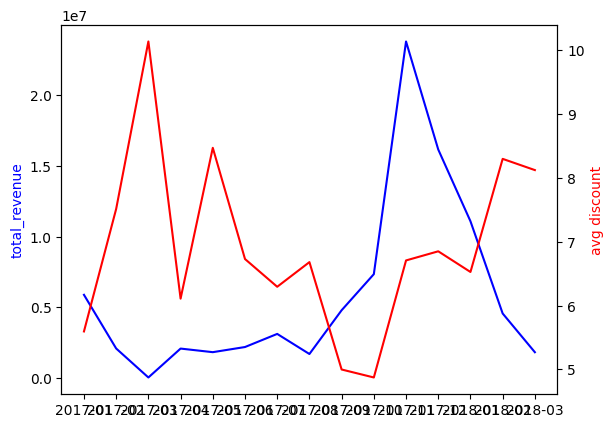

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# group by months and show the avg discount and the unit_price sum
monthly_avg_prices = merged_tables_filtered_high.groupby(merged_tables['date'].dt.to_period('M')).agg({'total_rev_500': 'sum', 'discount': 'sum', 'price': 'sum'}).reset_index()

# Berechnung des durchschnittlichen Rabattprozentsatzes
monthly_avg_prices['discount_percentage'] = (monthly_avg_prices['discount'] / monthly_avg_prices['price']) * 100

# Umwandeln des Period-Objekts in einen String
monthly_avg_prices['date'] = monthly_avg_prices['date'].dt.strftime('%Y-%m')

# Plot der Liniencharts
fig, ax1 = plt.subplots()

# Linie für den durchschnittlichen Verkaufspreis pro Jahr und Monat
ax1.plot(monthly_avg_prices['date'], monthly_avg_prices['total_rev_500'], color='blue')
ax1.set_ylabel('total_revenue', color='blue')

ax2 = ax1.twinx()

# Linie für den durchschnittlichen Rabattprozentsatz pro Jahr und Monat
ax2.plot(monthly_avg_prices['date'], monthly_avg_prices['discount_percentage'], color='red')
ax2.set_ylabel('avg discount', color='red')

plt.xticks(rotation=45)
plt.show()


### 11.4.2. Total rev low priced products & avg percentage of discount these items where sold for

In [ ]:
merged_tables_filtered_low = merged_tables[merged_tables["unit_price_x"] < 500]

In [ ]:
merged_tables_filtered_low["total_rev_500"] = merged_tables_filtered_low["unit_price_x"] * merged_tables_filtered_low["product_quantity_x"]

#### 11.4.2.1. Seaborn Plot

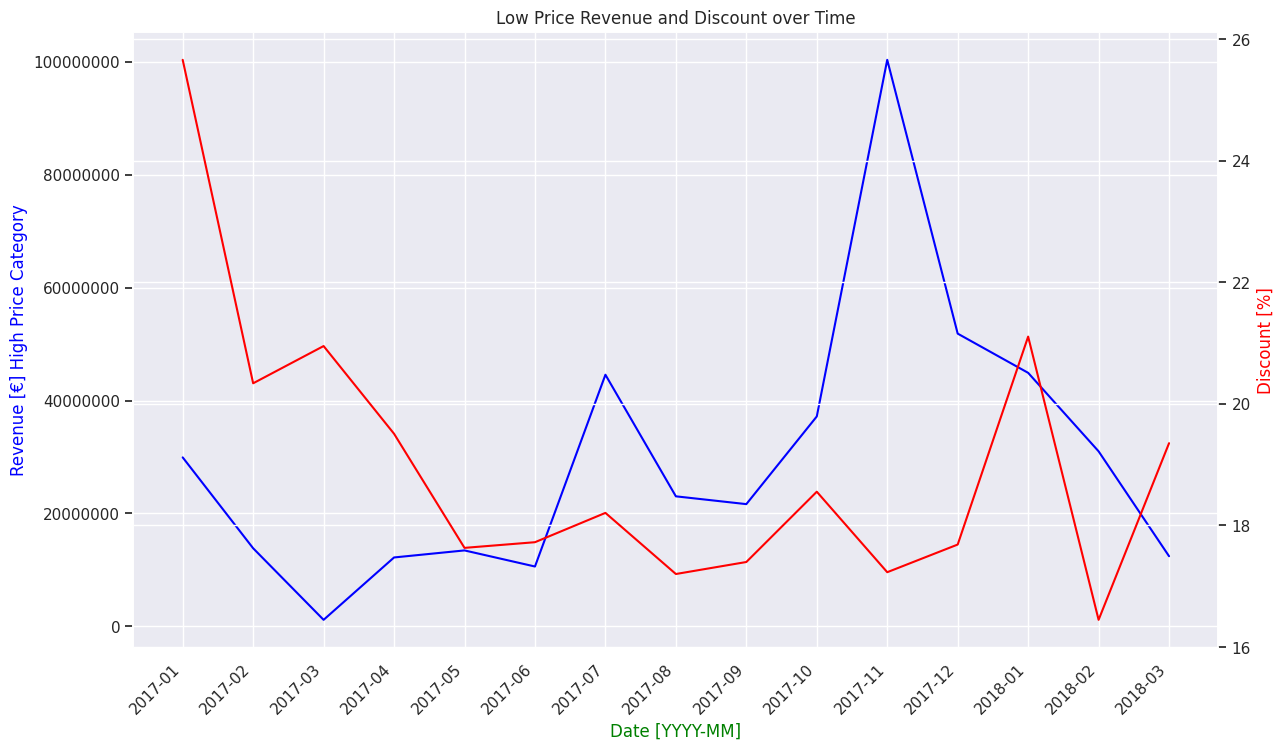

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# group by months and shows the avg discount and the unit_price sum
monthly_avg_prices = merged_tables_filtered_low.groupby(merged_tables['date'].dt.to_period('M')).agg({'total_rev_500': 'sum', 'discount': 'sum', 'price': 'sum'}).reset_index()

# calculates the avg percentage of given discounts
monthly_avg_prices['discount_percentage'] = (monthly_avg_prices['discount'] / monthly_avg_prices['price']) * 100

# changing the date dtype to string
monthly_avg_prices['date'] = monthly_avg_prices['date'].dt.strftime('%Y-%m')

# Create figure and axes
fig, ax1 = plt.subplots()

# Line plot for average sales price per year and month
chart = sns.lineplot(data=monthly_avg_prices, x='date', y='total_rev_500', ax=ax1, color='blue')
ax1.set_ylabel('Revenue [€] High Price Category', color='blue')

ax2 = ax1.twinx()

sns.set(rc={"figure.figsize":(14, 8)})

chart.set_xlabel("Date [YYYY-MM]", color="green")
chart.set(title='Low Price Revenue and Discount over Time')


# Line plot for average discount percentage per year and month
sns.lineplot(data=monthly_avg_prices, x='date', y='discount_percentage', ax=ax2, color='red')
ax2.set_ylabel('Discount [%]', color='red')

chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
ax1.ticklabel_format(style='plain', axis='y')
ax2.ticklabel_format(style='scientific', axis='y')

plt.show()


#### 11.4.2.2. Matplotlib Plot

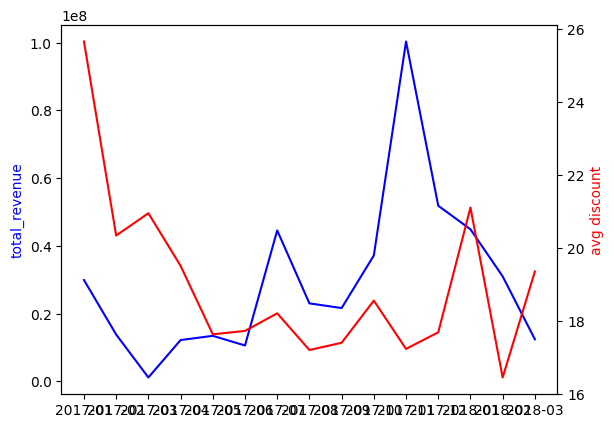

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# group by months and show the avg discount and the unit_price sum
monthly_avg_prices = merged_tables_filtered_low.groupby(merged_tables['date'].dt.to_period('M')).agg({'total_rev_500': 'sum', 'discount': 'sum', 'price': 'sum'}).reset_index()

# Berechnung des durchschnittlichen Rabattprozentsatzes
monthly_avg_prices['discount_percentage'] = (monthly_avg_prices['discount'] / monthly_avg_prices['price']) * 100

# Umwandeln des Period-Objekts in einen String
monthly_avg_prices['date'] = monthly_avg_prices['date'].dt.strftime('%Y-%m')

# Plot der Liniencharts
fig, ax1 = plt.subplots()

# Linie für den durchschnittlichen Verkaufspreis pro Jahr und Monat
ax1.plot(monthly_avg_prices['date'], monthly_avg_prices['total_rev_500'], color='blue')
ax1.set_ylabel('total_revenue', color='blue')

ax2 = ax1.twinx()

# Linie für den durchschnittlichen Rabattprozentsatz pro Jahr und Monat
ax2.plot(monthly_avg_prices['date'], monthly_avg_prices['discount_percentage'], color='red')
ax2.set_ylabel('avg discount', color='red')

plt.xticks(rotation=45)
plt.show()


### 11.4.3. Total rev products in the category "Charger" & avg percentage of discount these items where sold for

In [ ]:
merged_tables["category"].unique()

array(['', 'RAM', 'Cables', 'Headsets', 'Wireless adapter',
       'sleeve cases', 'Docking station', 'Phone case', 'Smart home',
       'iPad Cases', 'Monitor', 'Digital pens', 'External hard drive',
       'Internal hard drive', 'Computer Retina Display', 'Server',
       'Graphics tablet', 'Memory cards', 'External storage',
       'Screen protection', 'Repair services', 'Speaker', 'Power bank',
       '?', 'Charger', 'Adapter', 'Apple watch strap', 'Desktop computer',
       'MacBook'], dtype=object)

In [ ]:
total_rev_char = merged_tables[merged_tables["brands"] == "Pack"]

NameError: ignored

In [ ]:
total_rev_char[total_rev_char["category"] == "Desktop computer"]
# avg price 47€

,sku,name,desc,price,in_stock,type,category,brands,product_quantity_x,unit_price_x,discount,discount_t_f,total_revenue,id,id_order,product_id,product_quantity_y,unit_price_y,date


In [ ]:
total_rev_char["total_rev_char"] = total_rev_char["unit_price_x"] * total_rev_char["product_quantity_x"]

#### 11.4.3.1. Seaborn Plot

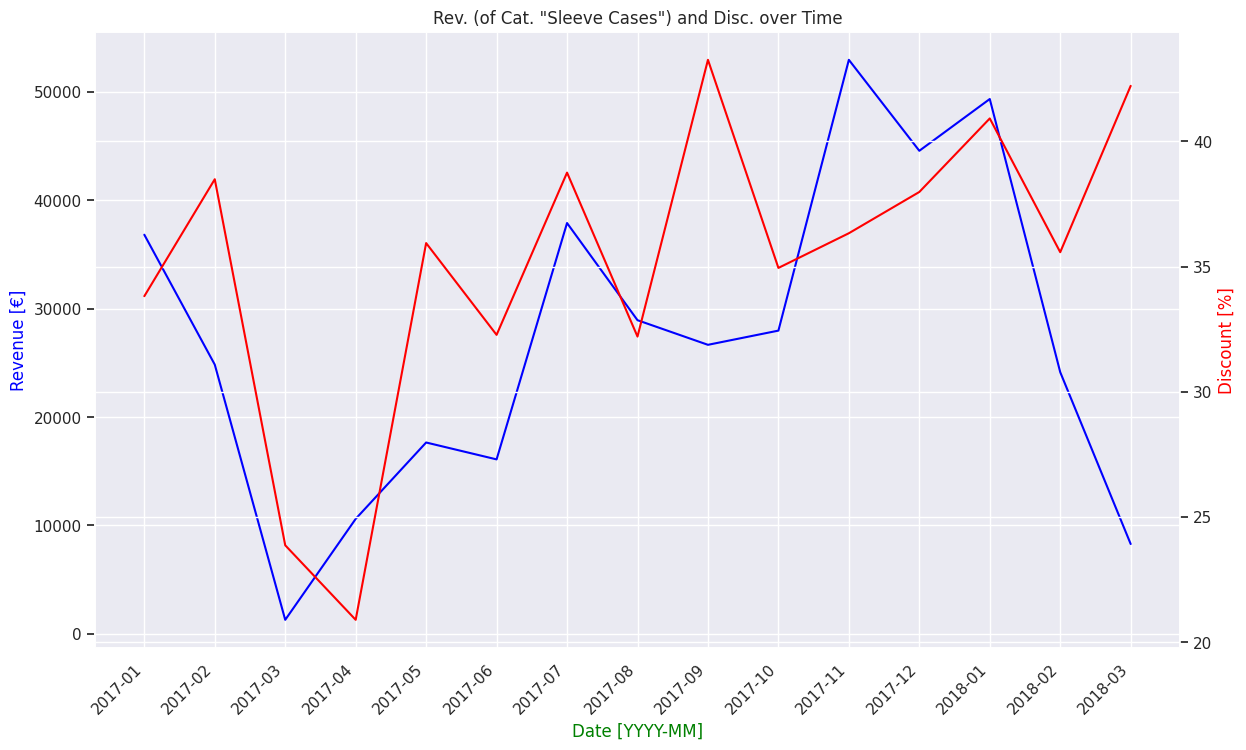

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# group by months and shows the avg discount and the unit_price sum
monthly_avg_prices = total_rev_char.groupby(merged_tables['date'].dt.to_period('M')).agg({'total_rev_char': 'sum', 'discount': 'sum', 'price': 'sum'}).reset_index()

# calculates the avg percentage of given discounts
monthly_avg_prices['discount_percentage'] = (monthly_avg_prices['discount'] / monthly_avg_prices['price']) * 100

# changing the date dtype to string
monthly_avg_prices['date'] = monthly_avg_prices['date'].dt.strftime('%Y-%m')

# Create figure and axes
fig, ax1 = plt.subplots()

# Line plot for average sales price per year and month
chart = sns.lineplot(data=monthly_avg_prices, x='date', y='total_rev_char', ax=ax1, color='blue')
ax1.set_ylabel('Revenue [€]', color='blue')

ax2 = ax1.twinx()

sns.set(rc={"figure.figsize":(14, 8)})

chart.set_xlabel("Date [YYYY-MM]", color="green")
chart.set(title='Rev. (of Cat. "Sleeve Cases") and Disc. over Time')


# Line plot for average discount percentage per year and month
sns.lineplot(data=monthly_avg_prices, x='date', y='discount_percentage', ax=ax2, color='red')
ax2.set_ylabel('Discount [%]', color='red')

chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
ax1.ticklabel_format(style='plain', axis='y')
ax2.ticklabel_format(style='scientific', axis='y')

plt.show()


#### 11.4.3.2. Matplotlib Plot

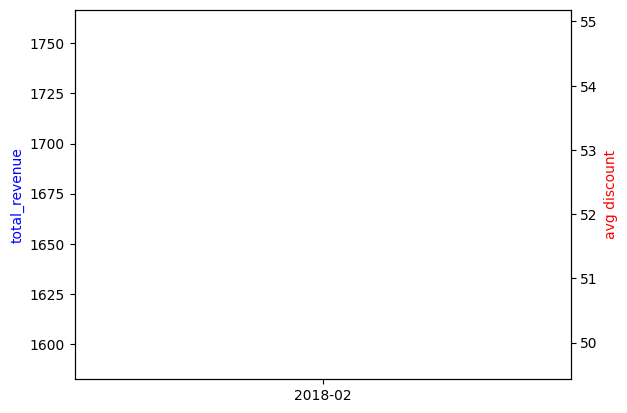

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# group by months and show the avg discount and the unit_price sum
monthly_avg_prices = total_rev_char.groupby(merged_tables['date'].dt.to_period('M')).agg({'total_rev_char': 'sum', 'discount': 'sum', 'price': 'sum'}).reset_index()

# Berechnung des durchschnittlichen Rabattprozentsatzes
monthly_avg_prices['discount_percentage'] = (monthly_avg_prices['discount'] / monthly_avg_prices['price']) * 100

# Umwandeln des Period-Objekts in einen String
monthly_avg_prices['date'] = monthly_avg_prices['date'].dt.strftime('%Y-%m')

# Plot der Liniencharts
fig, ax1 = plt.subplots()

# Linie für den durchschnittlichen Verkaufspreis pro Jahr und Monat
ax1.plot(monthly_avg_prices['date'], monthly_avg_prices['total_rev_char'], color='blue')
ax1.set_ylabel('total_revenue', color='blue')

ax2 = ax1.twinx()

# Linie für den durchschnittlichen Rabattprozentsatz pro Jahr und Monat
ax2.plot(monthly_avg_prices['date'], monthly_avg_prices['discount_percentage'], color='red')
ax2.set_ylabel('avg discount', color='red')

plt.xticks(rotation=45)
plt.show()

In [ ]:
monthly_avg_prices['discount_percentage'].mean()

52.306631958486896

In [ ]:
merged_tables_filtered_low = merged_tables[merged_tables["unit_price_x"] < 1000]
total_rev_char = merged_tables_filtered_low [merged_tables_filtered_low ["brands"] == "Pack"]

In [ ]:
total_rev_char["unit_price_x"].max()

997.49

In [ ]:
total_rev_char["total_rev_char"] = total_rev_char["unit_price_x"] * total_rev_char["product_quantity_x"]

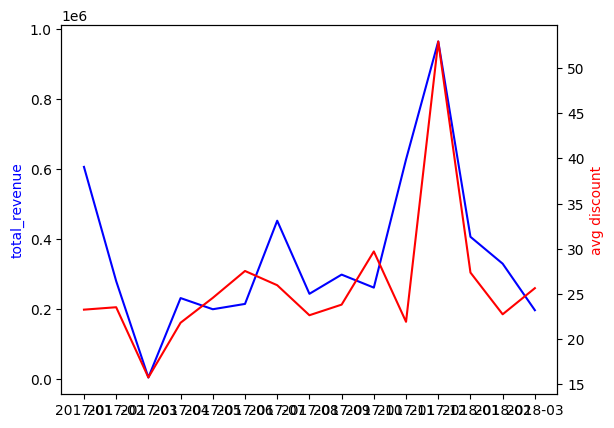

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# group by months and show the avg discount and the unit_price sum
monthly_avg_prices = total_rev_char.groupby(merged_tables['date'].dt.to_period('M')).agg({'total_rev_char': 'sum', 'discount': 'sum', 'price': 'sum'}).reset_index()

# Berechnung des durchschnittlichen Rabattprozentsatzes
monthly_avg_prices['discount_percentage'] = (monthly_avg_prices['discount'] / monthly_avg_prices['price']) * 100

# Umwandeln des Period-Objekts in einen String
monthly_avg_prices['date'] = monthly_avg_prices['date'].dt.strftime('%Y-%m')

# Plot der Liniencharts
fig, ax1 = plt.subplots()

# Linie für den durchschnittlichen Verkaufspreis pro Jahr und Monat
ax1.plot(monthly_avg_prices['date'], monthly_avg_prices['total_rev_char'], color='blue')
ax1.set_ylabel('total_revenue', color='blue')

ax2 = ax1.twinx()

# Linie für den durchschnittlichen Rabattprozentsatz pro Jahr und Monat
ax2.plot(monthly_avg_prices['date'], monthly_avg_prices['discount_percentage'], color='red')
ax2.set_ylabel('avg discount', color='red')

plt.xticks(rotation=45)
plt.show()

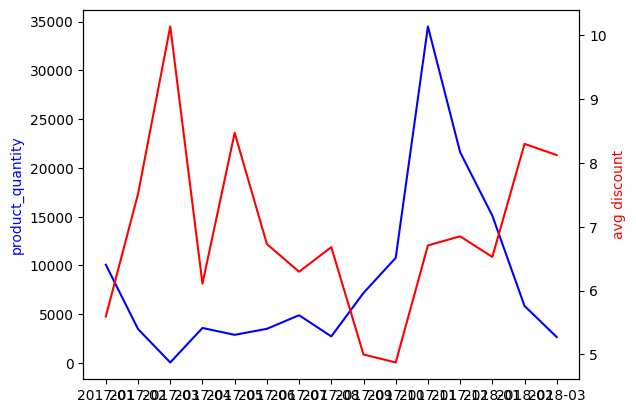

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# group by months and show the avg discount and the unit_price sum
monthly_avg_prices = merged_tables.groupby(merged_tables['date'].dt.to_period('M')).agg({'product_quantity_x': 'sum', 'discount': 'sum', 'price': 'sum'}).reset_index()

# Berechnung des durchschnittlichen Rabattprozentsatzes
monthly_avg_prices['discount_percentage'] = (monthly_avg_prices['discount'] / monthly_avg_prices['price']) * 100

# Umwandeln des Period-Objekts in einen String
monthly_avg_prices['date'] = monthly_avg_prices['date'].dt.strftime('%Y-%m')

# Plot der Liniencharts
fig, ax1 = plt.subplots()

# Linie für den durchschnittlichen Verkaufspreis pro Jahr und Monat
ax1.plot(monthly_avg_prices['date'], monthly_avg_prices['product_quantity_x'], color='blue')
ax1.set_ylabel('product_quantity', color='blue')

ax2 = ax1.twinx()

# Linie für den durchschnittlichen Rabattprozentsatz pro Jahr und Monat
ax2.plot(monthly_avg_prices['date'], monthly_avg_prices['discount_percentage'], color='red')
ax2.set_ylabel('avg discount', color='red')

plt.xticks(rotation=45)
plt.show()


In [ ]:
final_products_df[final_products_df["brands"] == "Pack"][["name", "desc", "unit_price", "brands", "sku"]].sample(20)

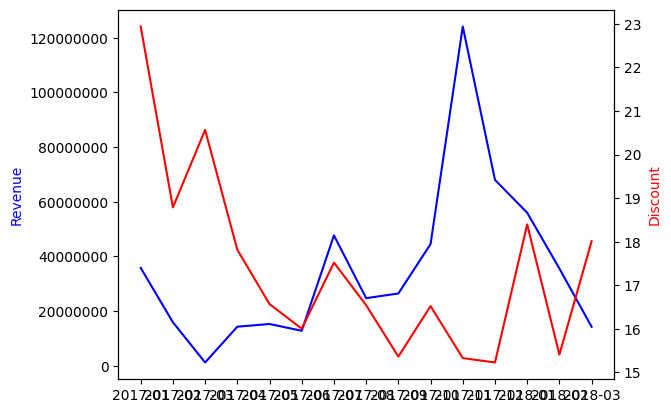

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# group by months and shows the avg discount and the unit_price sum
monthly_avg_prices = merged_tables.groupby(merged_tables['date'].dt.to_period('M')).agg({'total_revenue': 'sum', 'discount': 'sum', 'price': 'sum'}).reset_index()

# calculates the avg percentage of given discounts
monthly_avg_prices['discount_percentage'] = (monthly_avg_prices['discount'] / monthly_avg_prices['price']) * 100

# changing the date dtype to string
monthly_avg_prices['date'] = monthly_avg_prices['date'].dt.strftime('%Y-%m')

# Plots the line chart
fig, ax1 = plt.subplots()

# Linie für den durchschnittlichen Verkaufspreis pro Jahr und Monat
ax1.plot(monthly_avg_prices['date'], monthly_avg_prices['total_revenue'], color='blue')
ax1.set_ylabel('Revenue', color='blue')

ax2 = ax1.twinx()

# Linie für den durchschnittlichen Rabattprozentsatz pro Jahr und Monat
ax2.plot(monthly_avg_prices['date'], monthly_avg_prices['discount_percentage'], color='red')
ax2.set_ylabel('Discount', color='red')

plt.xticks(rotation=45)
ax1.ticklabel_format(style='plain', axis='y')
ax2.ticklabel_format(style='scientific', axis='y')
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# group by months and shows the avg discount and the unit_price sum
monthly_avg_prices = merged_tables.groupby(merged_tables['date'].dt.to_period('M')).agg({'total_revenue': 'sum', 'discount': 'sum', 'price': 'sum'}).reset_index()

# calculates the avg percentage of given discounts
monthly_avg_prices['discount_percentage'] = (monthly_avg_prices['discount'] / monthly_avg_prices['price']) * 100

# changing the date dtype to string
monthly_avg_prices['date'] = monthly_avg_prices['date'].dt.strftime('%Y-%m')

# Create figure and axes
fig, ax1 = plt.subplots()

# Line plot for average sales price per year and month
sns.lineplot(data=monthly_avg_prices, x='date', y='total_revenue', ax=ax1, color='blue')
ax1.set_ylabel('Revenue', color='blue')

ax2 = ax1.twinx()

# Line plot for average discount percentage per year and month
sns.lineplot(data=monthly_avg_prices, x='date', y='discount_percentage', ax=ax2, color='red')
ax2.set_ylabel('Discount', color='red')

plt.xticks(rotation=45)
ax1.ticklabel_format(style='plain', axis='y')
ax2.ticklabel_format(style='scientific', axis='y')

plt.show()


## Addition: Exploring brands

In [ ]:
merged_tables_filtered_low = merged_tables[merged_tables["unit_price_x"] < 1000]
total_rev_char = merged_tables_filtered_low [merged_tables_filtered_low ["brands"] == "Pack"]

In [ ]:
total_rev_char["unit_price_x"].max()

997.49

In [ ]:
total_rev_char["total_rev_char"] = total_rev_char["unit_price_x"] * total_rev_char["product_quantity_x"]

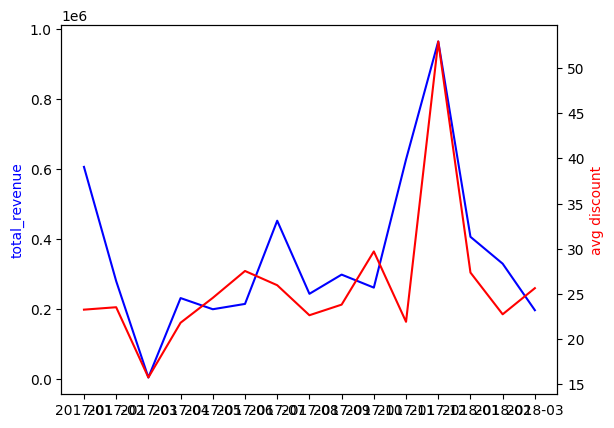

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# group by months and show the avg discount and the unit_price sum
monthly_avg_prices = total_rev_char.groupby(merged_tables['date'].dt.to_period('M')).agg({'total_rev_char': 'sum', 'discount': 'sum', 'price': 'sum'}).reset_index()

# Berechnung des durchschnittlichen Rabattprozentsatzes
monthly_avg_prices['discount_percentage'] = (monthly_avg_prices['discount'] / monthly_avg_prices['price']) * 100

# Umwandeln des Period-Objekts in einen String
monthly_avg_prices['date'] = monthly_avg_prices['date'].dt.strftime('%Y-%m')

# Plot der Liniencharts
fig, ax1 = plt.subplots()

# Linie für den durchschnittlichen Verkaufspreis pro Jahr und Monat
ax1.plot(monthly_avg_prices['date'], monthly_avg_prices['total_rev_char'], color='blue')
ax1.set_ylabel('total_revenue', color='blue')

ax2 = ax1.twinx()

# Linie für den durchschnittlichen Rabattprozentsatz pro Jahr und Monat
ax2.plot(monthly_avg_prices['date'], monthly_avg_prices['discount_percentage'], color='red')
ax2.set_ylabel('avg discount', color='red')

plt.xticks(rotation=45)
plt.show()

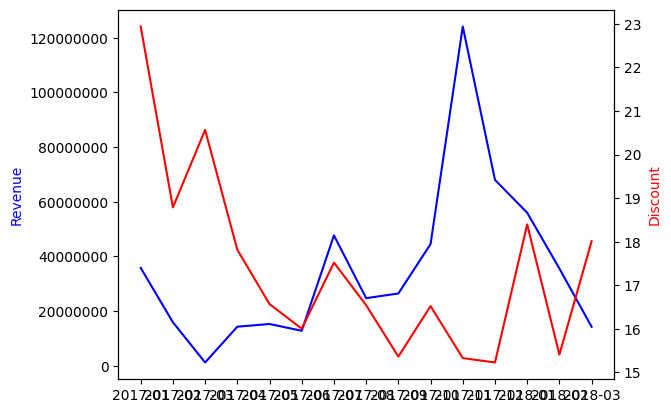

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# group by months and shows the avg discount and the unit_price sum
monthly_avg_prices = merged_tables.groupby(merged_tables['date'].dt.to_period('M')).agg({'total_revenue': 'sum', 'discount': 'sum', 'price': 'sum'}).reset_index()

# calculates the avg percentage of given discounts
monthly_avg_prices['discount_percentage'] = (monthly_avg_prices['discount'] / monthly_avg_prices['price']) * 100

# changing the date dtype to string
monthly_avg_prices['date'] = monthly_avg_prices['date'].dt.strftime('%Y-%m')

# Plots the line chart
fig, ax1 = plt.subplots()

# Linie für den durchschnittlichen Verkaufspreis pro Jahr und Monat
ax1.plot(monthly_avg_prices['date'], monthly_avg_prices['total_revenue'], color='blue')
ax1.set_ylabel('Revenue', color='blue')

ax2 = ax1.twinx()

# Linie für den durchschnittlichen Rabattprozentsatz pro Jahr und Monat
ax2.plot(monthly_avg_prices['date'], monthly_avg_prices['discount_percentage'], color='red')
ax2.set_ylabel('Discount', color='red')

plt.xticks(rotation=45)
ax1.ticklabel_format(style='plain', axis='y')
ax2.ticklabel_format(style='scientific', axis='y')
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# group by months and shows the avg discount and the unit_price sum
monthly_avg_prices = merged_tables.groupby(merged_tables['date'].dt.to_period('M')).agg({'total_revenue': 'sum', 'discount': 'sum', 'price': 'sum'}).reset_index()

# calculates the avg percentage of given discounts
monthly_avg_prices['discount_percentage'] = (monthly_avg_prices['discount'] / monthly_avg_prices['price']) * 100

# changing the date dtype to string
monthly_avg_prices['date'] = monthly_avg_prices['date'].dt.strftime('%Y-%m')

# Create figure and axes
fig, ax1 = plt.subplots()

# Line plot for average sales price per year and month
sns.lineplot(data=monthly_avg_prices, x='date', y='total_revenue', ax=ax1, color='blue')
ax1.set_ylabel('Revenue', color='blue')

ax2 = ax1.twinx()

# Line plot for average discount percentage per year and month
sns.lineplot(data=monthly_avg_prices, x='date', y='discount_percentage', ax=ax2, color='red')
ax2.set_ylabel('Discount', color='red')

plt.xticks(rotation=45)
ax1.ticklabel_format(style='plain', axis='y')
ax2.ticklabel_format(style='scientific', axis='y')

plt.show()


In [ ]:
merged_tables[merged_tables["brands"] == "Pack"][["brands", "name", "desc"]].sample(10)

,brands,name,desc
4203407,Pack,Pack of 2 units Zagg Coda Wireless Headsets Black,Pack 2 Bluetooth wireless headset with autonom...
3303476,Pack,expansion kit 525GB + SSD Crucial MX300 Datado...,Upgrade kit 525GB SSD for MacBook Late 2008 an...
4204846,Pack,Pack of 2 units Zagg Coda Wireless Headsets Black,Pack 2 Bluetooth wireless headset with autonom...
4000503,Pack,Synology DS918 + NAS Server | 12GB | 8TB (4x2T...,NAS server of the Plus Series for companies se...
1232341,Pack,Samsung SSD 850 expansion kit EVO 250GB + Data...,SSD upgrade kit for Mac Mini 250GB Early / Lat...
1235664,Pack,Samsung SSD 850 expansion kit EVO 250GB + Data...,SSD upgrade kit 2008-2010 250 GB MacBook and M...
4203444,Pack,Pack of 2 units Zagg Coda Wireless Headsets Black,Pack 2 Bluetooth wireless headset with autonom...
4211296,Pack,Pack of 2 units Zagg Coda Wireless Headsets Black,Pack 2 Bluetooth wireless headset with autonom...
1232083,Pack,Samsung SSD 850 expansion kit EVO 250GB + Data...,SSD upgrade kit for Mac Mini 250GB Early / Lat...
4201761,Pack,Pack of 2 units Zagg Coda Wireless Headsets Black,Pack 2 Bluetooth wireless headset with autonom...


In [ ]:
merged_tables[merged_tables["brands"] == "Pack"]["unit_price_x"].min()

16.52